<h1 style="color: #001a79;">Weekly Exercises</h1>

<hr style="border-top: 1px solid #001a79;" />

<h3 style="color: #001a79;">Exercise 2.1</h3>

<hr style="border-top: 1px solid #001a79;" />

__Task:__
<br>

- Use numpy and matplotlib to plot the absolute value function.
<br>

- Research and explain why the absolute value function is not typically used in fitting straight lines to data.

The following code was adapted from: https://numpy.org/doc/stable/reference/generated/numpy.absolute.html

In [1]:
# For numerical arrrays.
import numpy as np

# For data visualization. 
import matplotlib.pyplot as plt

In [2]:
# Setting the default plot size to be bigger for better visualization.
plt.rcParams['figure.figsize'] = (8, 6)

In [3]:
# Using numpy random rand to generate 1 random array containing 2 random values.
x = np.random.rand(1,2)

# absolute can also be shorteded to abs(x).
np.absolute(x)

array([[0.16972601, 0.65525265]])

In [4]:
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
# now using numpy arange to return evenly spaced values within a given interval.
x = np.arange(-6, 6)
x

array([-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

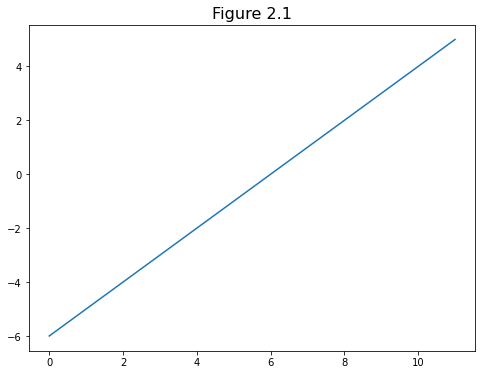

In [5]:
# Plotting the value x.
plt.plot(x)
plt.title("Figure 2.1", size=16)
plt.show()

In [6]:
# Getting absolute value of x.
np.abs(x)

array([6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5])

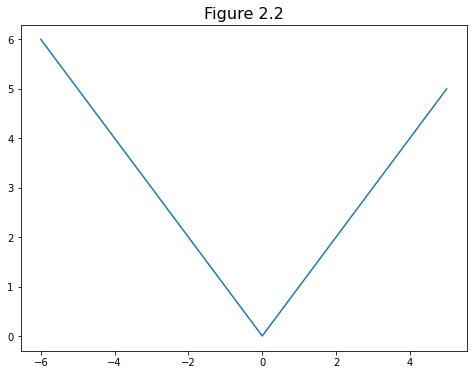

In [7]:
# Plotting the absolute value of x .
plt.plot(x, np.absolute(x))
plt.title("Figure 2.2", size=16)
plt.show()

I found a few interesting blogs with explainations about numpy's absolute value. They can be found here: 
<br>

* https://www.sharpsightlabs.com/blog/numpy-absolute-value/ 
<br>

* https://sparkbyexamples.com/numpy/numpy-absolute-value/
<br>

* https://blog.finxter.com/python-abs/

The numpy absolute function only takes in one argument; x. This can be a single argument which can also be in the form of an array. And it outputs the absolute value of that argument. It will do this with a single value or an array of values. <br>

In other words, it is a mathematical function which returns a positive value. Therefore, if you were to get the absolute value of -6 it would return 6. 
<br>

What's interesting is that python also has a build in abs function.<br>
However, python's abs function will return an integer wheras numpy's abs function can return a float and more importantly it can be applied to numpy arrays. 

<h4 style="color: #001a79;">The Question is: why is the absolute value function not typically used in fitting straight lines to data.</h4>
<br>

The answer is simply because it is returning the absolute value. Take the array x above. <br>

The origional array created ranged from -6 to +6 and fitted a straight line as can be seen in Figure 2.1.
<br>

Whereas, when applying the numpy absolute function to x it changed the origional values of the array. Therefore, what would have fitted a straight line, now has the shape of an arrow head as seen in Figure 2.2. 
<br>

Hence, why the numpy absolute function isn't typically used in fitting straight lines to data.
<br><br>

<hr style="border-top: 1px solid #001a79;" />
<br>

<h3 style="color: #001a79;">Exercise 2.2</h3>

<hr style="border-top: 1px solid #001a79;" />

__Task:__
<br>

- Fit a straight line to the following data points, using all three methods used above (using the polyfit, minimize, and curve_fit methods.).
<br>

- Do you think a straight line is a good model for these points?

x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]<br>
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

The following code was adapted from:

In [8]:
# Import modules

# For optimization.
import scipy.optimize as so

# For numerical arrays.
import numpy as np

<h3 style="color: #001a79;">Numpy Polyfit Method</h3>
<br>

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [9]:
# Specifying values for x and y.
# Converting to numpy array to allow for calculation.
x = np.array([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0])
y = np.array([0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1])

In [10]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from w and d.
x_zero = x - x_avg
y_zero = y - y_avg

# The best m is found by the following calculation.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Use m from above to calculate the best c.
c = y_avg - m * x_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 0.103158 and c is 1.049474.


In [11]:
np.polyfit(x, y, 1)

array([0.10315789, 1.04947368])

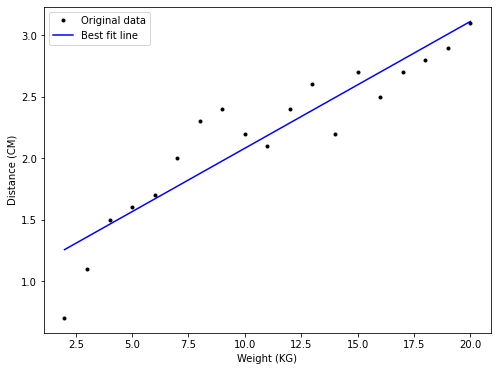

In [12]:
# Plot the best fit line.
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m * x + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.legend()

# Show the plot.
plt.show()

<h3 style="color: #001a79;">Scipy Optimize Minimize</h3>
<br>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [13]:
# Specifying values for x and y.
# Converting to numpy array to allow for calculation.
x = np.array([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0])
y = np.array([0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1])

In [14]:
# We are going to use minimize function in scipy.optimize.
# So - what do we need? First we need a function to minimze.

# x and y are have fixed values in this scenario as above.

# The function to be minimized - the cost function.
# It must take a single argument! But our cost function takes 2: m and c.
# So, we'll put them in a list called MC. e.g. MC = (5, 10)
def cost(MC):
    # Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost

In [15]:
# Run a quick test.
cost((5.0, 10.0))

88639.75

In [16]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
result = so.minimize(cost, (2.0, 2.0))
# Show the results.
result

      fun: 1.0395789473691037
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([2.98023224e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [17]:
# Extract the optimized m and c.
m_o, c_o = result.x
# Print them.
m_o, c_o

(0.10315786014998399, 1.04947405671058)

In [18]:
# Previous, analytical result.
m_a, c_a = np.polyfit(x, y, 1)
# Print analytical results.
m_a, c_a

(0.10315789473684209, 1.0494736842105254)

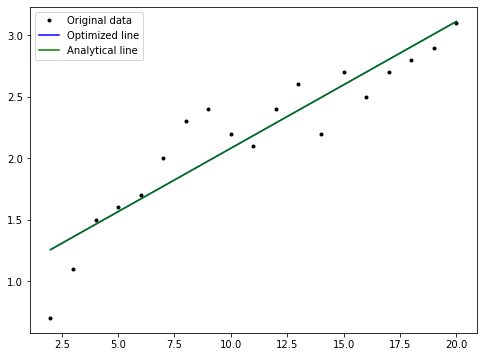

In [19]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line')
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

<h3 style="color: #001a79;">Scipy Optimize Curve Fit</h3>
<br>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [20]:
# Specifying values for x and y.
# Converting to numpy array to allow for calculation.
x = np.array([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0])
y = np.array([0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1])

In [21]:
# Create the model function.
def f(x, m, c):
    return m * x + c

In [22]:
# Run curve_fit.
result = so.curve_fit(f, x, y)

In [23]:
# Look at the result.
result

(array([0.10315789, 1.04947369]),
 array([[ 0.00010728, -0.00118012],
        [-0.00118012,  0.01619984]]))

In [24]:
# Pull out the parameters.
m_f, c_f = result[0]
# Print values.
m_f, c_f

(0.10315789458399933, 1.0494736859688867)

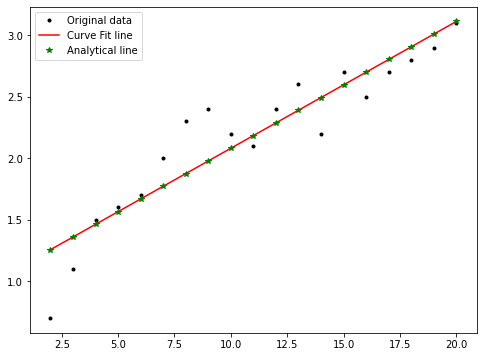

In [25]:
# Plotting all three!!
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_f * x + c_f, 'r-', label='Curve Fit line')
ax.plot(x, m_a * x + c_a, 'g*', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

<hr style="border-top: 1px solid #001a79;" />

<h3 style="color: #001a79;">End</h3>